In [1]:
import numpy as np 
import scipy.io as sio
import matplotlib.pyplot as plt 
import os
from tqdm import tqdm, notebook
import cartopy
import xarray as xr

In [2]:
# era5_file = '/localdrive/drive10/jj/mdtf/wkdir/MDTF_ERA5.ALL.DEG15.001_1950_2019/etc_composites/tmp/RUNDIR/tmprun/read_tmprun/tmprun_1950.mat'
era5_file = '/localdrive/drive10/jj/mdtf/wkdir/MDTF_ERA5.ALL.DEG15.001_1950_1950/etc_composites/tmp/RUNDIR/tmprun/read_tmprun/tmprun_1950.mat'
test_file = '/localdrive/drive10/jj/mdtf/wkdir/MDTF_ERA5.ALL.DEG15.001_1950_2019/etc_composites/tmp/RUNDIR/tmprun/read_tmprun/tmprun_1950.mat'
gfdl_file = '/localdrive/drive10/jj/mdtf/wkdir/MDTF_GFDL.EXP1.2PM.001_2008_2012/etc_composites/tmp/RUNDIR/tmprun/read_tmprun/tmprun_2008.mat'
erai_file = '/localdrive/drive10/jj/mdtf/wkdir/MDTF_ERAI.EXP1.TEST.001_2008_2012/etc_composites/tmp/RUNDIR/tmprun/read_tmprun/tmprun_2008.mat'

In [3]:
e5Data = sio.loadmat(era5_file)['cyc']
testData = sio.loadmat(test_file)['cyc']
gData = sio.loadmat(gfdl_file)['cyc']
eiData = sio.loadmat(erai_file)['cyc']

In [4]:
# data = eiData
data = e5Data
# data = gData

def extract_data(data, jimmy=False):
    var_list = ['fulllat', 'fulllon', 'fullslp', 'fullyr', 'fullmon', 'fullday', 'fullhr']
    
    in_data = {}
    for var in var_list:
        if (jimmy) & (var == 'fullhr'):
            continue
        in_data[var] = []

    for i in notebook.tqdm(range(data['fulllat'].shape[1])):
        for var in var_list:
            if (jimmy) & (var == 'fullhr'):
                continue
            in_data[var].extend(np.squeeze(np.squeeze(data[var])[i]))

    for var in var_list:
        if (jimmy) & (var == 'fullhr'):
            continue
        in_data[var] = np.array(in_data[var])
        
    return in_data

e5_data = extract_data(e5Data)
ei_data = extract_data(eiData)
g_data = extract_data(gData)

On November 25th, 1950, there was a storm that did significant damage to the New York area.

This track is apparently missing from my tracks.

I have to diagnose this problem.

In [5]:
in_data = e5_data
lon = in_data['fulllon']
lon[lon > 180] -= 360 

In [6]:
ind = (in_data['fullyr'] == 1950) & (in_data['fullmon'] == 11) & (in_data['fullday'] == 25)
# ind = (in_data['fullyr'] == 1950)

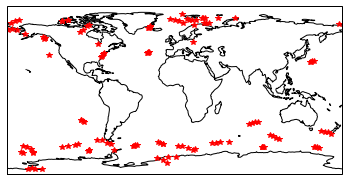

In [7]:
plt.figure()
ax = plt.subplot(111, projection=cartopy.crs.PlateCarree())
ax.plot(in_data['fulllon'][ind], in_data['fulllat'][ind], 'r*')
ax.coastlines()
ax.set_extent([-180, 180, -90, 90])
plt.show()

Lets check if the storm is visible from my SLP input data

In [8]:
slp_file = '/localdrive/drive10/jj/mdtf/inputdata/model/ERA5.ALL.DEG15.001/6hr/ERA5.ALL.DEG15.001.SLP.6hr.nc'
ds = xr.open_dataset(slp_file)
select = ds.sel(time='1950-11-25')

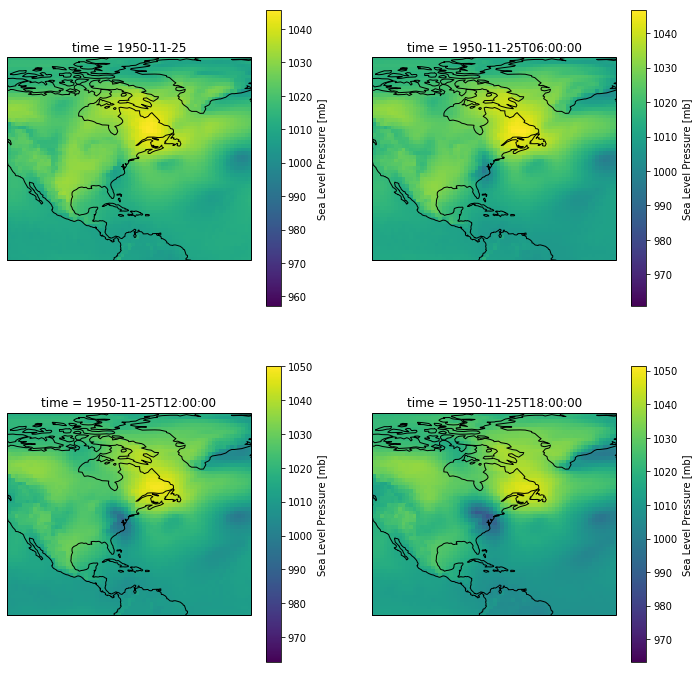

In [9]:
ny_cdt = [-74, 40]
lon_div = 50
lat_div = 40
extent = [ny_cdt[0]-lon_div, ny_cdt[0]+lon_div, ny_cdt[1]-lat_div, ny_cdt[1]+lat_div] #40.7128° N, 74.0060° W
 
plt.figure(figsize=(12,12))
ax=plt.subplot(2,2,1, projection=cartopy.crs.PlateCarree())
select.SLP.isel(time=0).plot(ax=ax)
ax.coastlines()
ax.set_extent(extent)

ax=plt.subplot(2,2,2, projection=cartopy.crs.PlateCarree())
select.SLP.isel(time=1).plot(ax=ax)
ax.coastlines()
ax.set_extent(extent)

ax=plt.subplot(2,2,3, projection=cartopy.crs.PlateCarree())
select.SLP.isel(time=2).plot(ax=ax)
ax.coastlines()
ax.set_extent(extent)

ax=plt.subplot(2,2,4, projection=cartopy.crs.PlateCarree())
select.SLP.isel(time=3).plot(ax=ax)
ax.coastlines()
ax.set_extent(extent)

plt.show()


Lets read in the raw ERA5 SLP data to track the cyclones

In [10]:
file = '/localdrive/drive6/era5/data/six_hrly/data_1_5deg/msl/msl_1950_6hrly.nc'
ds = xr.open_dataset(file)
select = ds.sel(time='1950-11-25')

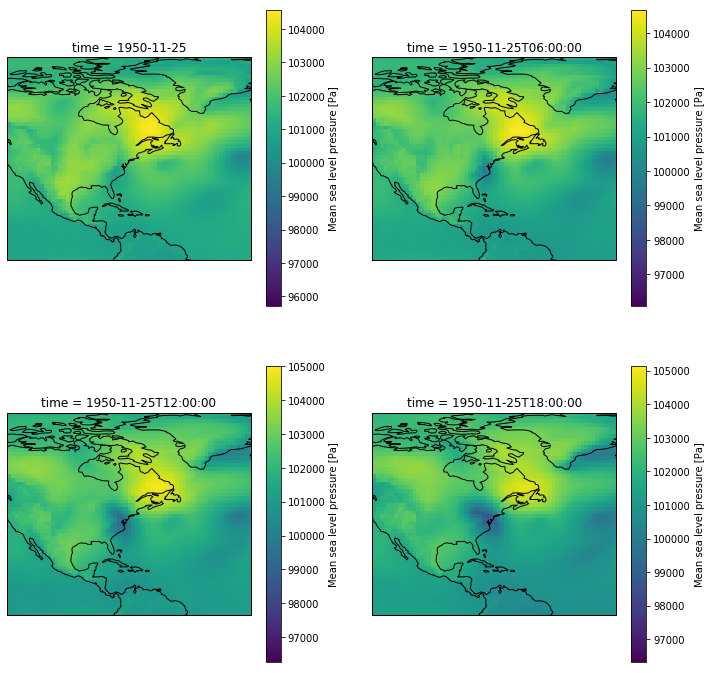

In [11]:
lon_div = 50
lat_div = 40
extent = [-74-lon_div, -74+lon_div, 40-lat_div, 40+lat_div] #40.7128° N, 74.0060° W
 
plt.figure(figsize=(12,12))
ax=plt.subplot(2,2,1, projection=cartopy.crs.PlateCarree())
select.msl.isel(time=0).plot(ax=ax)
ax.coastlines()
ax.set_extent(extent)

ax=plt.subplot(2,2,2, projection=cartopy.crs.PlateCarree())
select.msl.isel(time=1).plot(ax=ax)
ax.coastlines()
ax.set_extent(extent)

ax=plt.subplot(2,2,3, projection=cartopy.crs.PlateCarree())
select.msl.isel(time=2).plot(ax=ax)
ax.coastlines()
ax.set_extent(extent)

ax=plt.subplot(2,2,4, projection=cartopy.crs.PlateCarree())
select.msl.isel(time=3).plot(ax=ax)
ax.coastlines()
ax.set_extent(extent)
plt.show()

Lets now check the dumped centers from the RUN

In [12]:
import pandas as pd

In [13]:
dumped_file = '/localdrive/drive10/jj/mdtf/wkdir/MDTF_ERA5.ALL.DEG15.001_1950_1950/etc_composites/tmp/RUNDIR/tmprun/out_tmprun/tmprun/mcms_tmprun_1950_dumped_centers.txt'
centers_file = '/localdrive/drive10/jj/mdtf/wkdir/MDTF_ERA5.ALL.DEG15.001_1950_1950/etc_composites/tmp/RUNDIR/tmprun/out_tmprun/tmprun/mcms_tmprun_1950_centers.txt'


In [133]:
dumped_df = pd.read_csv(dumped_file,sep='\s+', header=None)
centers_df = pd.read_csv(centers_file,sep='\s+', header=None)
dumped_df.insert(16, 'new-col', 0)
centers_df.insert(16, 'new-col', 1)

main_df = pd.concat([dumped_df, centers_df])

df = main_df.iloc[:, [0, 1, 2, 3, 5, 6, 8, 15, 16]].copy()
df.columns = ['yy', 'mm', 'dd', 'hh', 'lat', 'lon', 'slp', 'usi', 'type']
df.lat = 90. - df.lat/100. 
df.lon = df.lon/100.
df['lon'][df.lon > 180] = df.lon[df.lon > 180] - 360

all_df = df.copy()
raw_df = df.copy()

print(df.shape)

(165860, 9)


/home/jj/anaconda3/envs/mcms/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


157
293


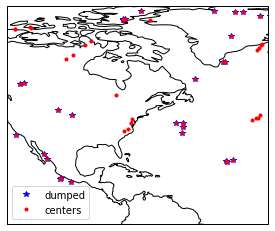

In [134]:
dumped_ind = (df.yy == 1950) & (df.mm == 11) & (df.dd == 25) & (df.type == 0)
print(np.sum(dumped_ind))
centers_ind = (df.yy == 1950) & (df.mm == 11) & (df.dd == 25) & (df.type == 1)
print(np.sum(centers_ind))

plt.figure()
ax = plt.subplot(111, projection=cartopy.crs.PlateCarree())
ax.plot(df.lon[dumped_ind], df.lat[dumped_ind], 'b*', label='dumped')
ax.plot(df.lon[centers_ind], df.lat[centers_ind], 'r.', label='centers')
ax.coastlines()
ax.set_extent(extent)
plt.legend(loc=0)
plt.show()

Looks like the centers are detected in the centers file.

Now we have to check if it is also there in tracks file.

In [135]:
tracks_file = '/localdrive/drive10/jj/mdtf/wkdir/MDTF_ERA5.ALL.DEG15.001_1950_1950/etc_composites/tmp/RUNDIR/tmprun/out_tmprun/tmprun/mcms_tmprun_1950_tracks.txt'

In [136]:
main_df = pd.read_csv(tracks_file, sep='\s+', header=None)

df = main_df.iloc[:, [0, 1, 2, 3, 5, 6, 8, 15]].copy()
df.columns = ['yy', 'mm', 'dd', 'hh', 'lat', 'lon', 'slp', 'usi']
df.lat = 90. - df.lat/100. 
df.lon = df.lon/100.
df['lon'][df.lon > 180] = df.lon[df.lon > 180] - 360

tracks_df = df.copy()

/home/jj/anaconda3/envs/mcms/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


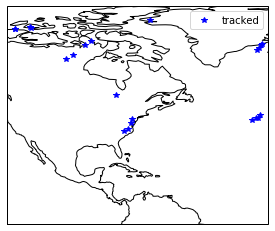

In [137]:
ind = (df.yy == 1950) & (df.mm == 11) & (df.dd == 25)

plt.figure()
ax = plt.subplot(111, projection=cartopy.crs.PlateCarree())
ax.plot(df.lon[ind], df.lat[ind], 'b*', label='tracked')
ax.coastlines()
ax.set_extent(extent)
plt.legend(loc=0)
plt.show()

Lets check the USI values for the New York tracks

In [138]:
ind = (df.yy == 1950) & (df.mm == 11) & (df.dd == 25) & (df.lat > ny_cdt[1]-10) & \
    (df.lat < ny_cdt[1]+10) & (df.lon > ny_cdt[0]-10) & (df.lon < ny_cdt[0]+10)

i_ind = df.usi[ind].values
i_ind = i_ind[2]

usi_ind = (df.usi == i_ind)
x = df[usi_ind]
# print(len(df.hh[usi_ind]))

In [139]:
import datetime as dt
from datetime import date
dates = [dt.datetime(iyy, imm, idd, ihh) for iyy,imm,idd,ihh in zip(df.yy[usi_ind], df.mm[usi_ind], df.dd[usi_ind], df.hh[usi_ind])]
full_dates = [date.toordinal(date(iyy, imm, idd))+360+ihh/24. for iyy,imm,idd,ihh in zip(df.yy[usi_ind], df.mm[usi_ind], df.dd[usi_ind], df.hh[usi_ind])]

In [140]:
print(full_dates)

[712545.75, 712546.0, 712546.25, 712546.5, 712546.75, 712547.0, 712547.25, 712547.5, 712547.75, 712548.0, 712548.25, 712548.5, 712548.75]


In [141]:
print((dates[1]-dates[0]).total_seconds()/3600)
print((full_dates[1] - full_dates[0])*24)

6.0
6.0


Now I try and find the difference between my tracks and Jimmy's tracks. 

Check if the missing tracks are part of the dumped centers? 

j_df --> jimmy's mat file data
raw_df --> raw dumped/tracked files 

In [142]:
j_file = '/localdrive/drive10/jj/mdtf/data/era5_1950_cyc.mat'
j_cyc = sio.loadmat(j_file)['cyc']

m_file = '/localdrive/drive10/jj/mdtf/wkdir/MDTF_ERA5.ALL.DEG15.001_1950_1950/etc_composites/tmp/RUNDIR/tmprun/read_tmprun/tmprun_1950.mat'
m_cyc = sio.loadmat(m_file)['cyc']

In [143]:
j_data = extract_data(j_cyc, jimmy=True)
m_data = extract_data(m_cyc, jimmy=False)

In [144]:
j_df = pd.DataFrame.from_dict(j_data)
j_df.columns = ['lat', 'lon', 'slp', 'yy', 'mm', 'dd']
j_df['lon'][j_df.lon > 180] = j_df.lon[j_df.lon > 180] - 360

raw_df = all_df.copy()
raw_df['lon'][raw_df.lon > 180] = raw_df.lon[raw_df.lon > 180] - 360
raw_df['slp'] = raw_df.slp/1000 
raw_df.pop('usi')
# raw_df.pop('type')
# type=0 dumped, type=1 selected centers

m_df = pd.DataFrame.from_dict(m_data)
m_df.columns = ['lat', 'lon', 'slp', 'yy', 'mm', 'dd', 'hh']
m_df['slp'] = m_df.slp/1000
m_df['lon'][m_df.lon > 180] = m_df.lon[m_df.lon > 180] - 360
m_df.pop('hh')
print(raw_df.head())

     yy  mm  dd  hh    lat     lon       slp  type
0  1950   1   1   0  25.77   54.64  1015.728     0
1  1950   1   1   0  19.56   93.28  1008.811     0
2  1950   1   1   0 -16.38   17.17  1005.532     0
3  1950   1   1   0 -18.09  112.61   997.200     0
4  1950   1   1   0 -22.35  138.40  1002.345     0


/home/jj/anaconda3/envs/mcms/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jj/anaconda3/envs/mcms/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/jj/anaconda3/envs/mcms/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import ke

In [145]:
date = dt.datetime(1950, 1, 2)
j_ind = (j_df.yy == date.year) & (j_df.mm == date.month) & (j_df.dd == date.day)
m_ind = (m_df.yy == date.year) & (m_df.mm == date.month) & (m_df.dd == date.day)
raw_ind = (raw_df.yy == date.year) & (raw_df.mm == date.month) & (raw_df.dd == date.day) & (raw_df.type == 0)

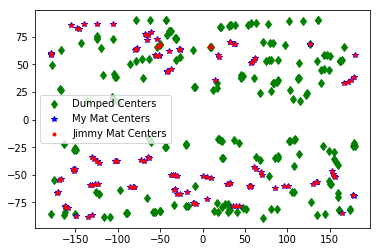

In [146]:
plt.plot(raw_df.lon[raw_ind], raw_df.lat[raw_ind], 'gd', label='Dumped Centers')
plt.plot(m_df.lon[m_ind], m_df.lat[m_ind], 'b*', label='My Mat Centers')
plt.plot(j_df.lon[j_ind], j_df.lat[j_ind], 'r.', label='Jimmy Mat Centers')
plt.legend()
plt.show()

In [147]:
# # df = j_df.merge(m_df, how='outer', indicator=True).loc[lambda x: x['_merge'] == 'j_only']
# df = j_df.merge(m_df, how='inner', indicator=False)
# print(df.head())

In [148]:
# find rows in j_df that are not available in m_df
# left_only = j_only
# right_only = m_only
df = j_df.merge(m_df, how='outer', indicator=True)#.loc[lambda x: x['_merge'] == 'j_only']
df

,lat,lon,slp,yy,mm,dd,_merge
0,84.12,-10.66,1018.993,1950,1,1,left_only
1,86.88,-33.38,1013.718,1950,1,1,left_only
2,87.32,-72.20,1007.482,1950,1,1,both
3,87.02,-91.37,1001.774,1950,1,1,both
4,86.81,-105.43,1001.808,1950,1,2,both
5,86.60,-123.98,1002.977,1950,1,2,both
6,86.36,-139.49,1005.360,1950,1,2,both
7,85.34,-155.44,1006.781,1950,1,2,left_only
8,83.48,-160.46,1008.297,1950,1,3,both
9,64.47,129.07,1008.320,1950,1,1,both


293 157 136


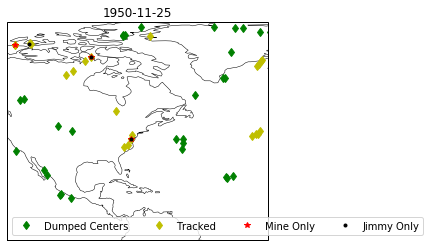

In [151]:
j_only_ind = df['_merge'] == 'left_only'
m_only_ind = df['_merge'] == 'right_only'
both_ind = df._merge == 'both'
dumped_ind = (raw_df.type == 0)

date = dt.datetime(1950, 11, 25)
date_ind = (df.yy == date.year) & (df.mm == date.month) & (df.dd == date.day)
j_only_ind = j_only_ind & date_ind
m_only_ind = m_only_ind & date_ind
both_ind = both_ind & date_ind

dumped_ind = (raw_df.yy == date.year) & (raw_df.mm == date.month) & (raw_df.dd == date.day) & (raw_df.type == 0)
centers_ind = (raw_df.yy == date.year) & (raw_df.mm == date.month) & (raw_df.dd == date.day) & (raw_df.type == 1)

track_ind = (tracks_df.yy == date.year) & (tracks_df.mm == date.month) & (tracks_df.dd == date.day)
print(np.sum(centers_ind), np.sum(dumped_ind), np.sum(track_ind))

# plt.figure(figsize=(10,6))
ax = plt.subplot(111, projection=cartopy.crs.PlateCarree())
ax.plot(raw_df[dumped_ind].lon, raw_df[dumped_ind].lat, 'gd', label='Dumped Centers')
# ax.plot(raw_df[centers_ind].lon, raw_df[centers_ind].lat, 'yd', label='Centers')
ax.plot(tracks_df[track_ind].lon, tracks_df[track_ind].lat, 'yd', label='Tracked')
ax.plot(df[m_only_ind].lon, df[m_only_ind].lat, 'r*', label='Mine Only')
ax.plot(df[j_only_ind].lon, df[j_only_ind].lat, 'k.', label='Jimmy Only')
ax.set_title(date.strftime('%Y-%m-%d'))
ax.coastlines(lw=.5)
ax.legend(loc=0, ncol=4)
ax.set_extent(extent)
plt.show()
# ax.plot(df[m_only_ind].lon, df[m_only_ind].lat, 'r.')

In [82]:
print(df[m_only_ind])
print(df[j_only_ind])
print(df[both_ind])

57953   -65.02
57960   -56.77
57993    74.55
58023    77.97
58046   -36.06
58047   -34.48
58049   -56.91
58064   -60.96
58066   -84.91
58067   -85.00
58069   -49.65
58075   -60.16
58076    65.94
58078    30.12
58079    31.26
58080    31.50
58088    69.95
58094    38.72
58098    70.37
58099    72.18
58101    75.17
58102   -32.04
58108   -53.14
58109   -53.67
58120   -74.82
58121   -71.44
58122   -61.90
58126    51.33
58128   -64.26
Name: lat, dtype: float64
         lat     lon       slp    yy  mm  dd     _merge
42980 -65.02  -93.31   977.718  1950  11  25  left_only
43012 -56.77   44.84   977.925  1950  11  25  left_only
43161  75.11 -115.48  1015.550  1950  11  25  left_only
43375  77.94   32.24   987.110  1950  11  25  left_only
43508 -36.06   79.91  1010.218  1950  11  25  left_only
43510 -34.48   86.00  1008.185  1950  11  25  left_only
43524 -56.91  -15.47   964.550  1950  11  25  left_only
43565 -84.91 -157.33   995.752  1950  11  25  left_only
43566 -85.00 -149.66   993.656  195

In [84]:
print(len(j_df))

47997


In [85]:
print(j_df.head())

     lat     lon       slp    yy  mm  dd
0  84.12  -10.66  1018.993  1950   1   1
1  86.88  -33.38  1013.718  1950   1   1
2  87.32  -72.20  1007.482  1950   1   1
3  87.02  -91.37  1001.774  1950   1   1
4  86.81 -105.43  1001.808  1950   1   2


In [107]:
j_only_lat = []
j_only_lon = []

date_ind = (j_df.yy == 1950) & (j_df.mm == 11) & (j_df.dd == 25)

for i in notebook.tqdm(range(len(j_df[date_ind]))):
    j_row = j_df.loc[i]
    ind = (j_row.yy == m_df.yy) & (j_row.mm == m_df.mm) & (j_row.dd == m_df.dd) \
        & (j_row.slp == m_df.slp) & (j_row.lat == m_df.lat) & (j_row.lon == m_df.lon) \
        & date_ind
    
    if (np.sum(ind) > 0):
        continue
    else:
        j_only_lat.append(j_row.lat)
        j_only_lon.append(j_row.lon)
    
    

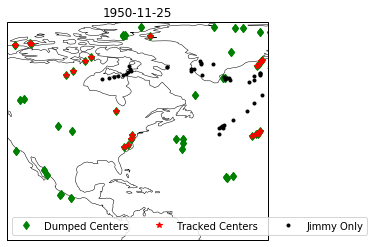

In [154]:
raw_ind = (raw_df.yy == 1950) & (raw_df.mm == 11) & (raw_df.dd == 25)

ax = plt.subplot(111, projection=cartopy.crs.PlateCarree())
# ax.plot(raw_df[dumped_ind].lon, raw_df[dumped_ind].lat, 'gd', label='Dumped Centers')
ax.plot(raw_df[raw_ind].lon, raw_df[raw_ind].lat, 'gd', label='Dumped Centers')
ax.plot(tracks_df[track_ind].lon, tracks_df[track_ind].lat, 'r*', label='Tracked Centers')
ax.plot(j_only_lon, j_only_lat, 'k.', label='Jimmy Only')
ax.set_title(date.strftime('%Y-%m-%d'))
ax.coastlines(lw=.5)
ax.legend(loc=0, ncol=3)
ax.set_extent(extent)
plt.show()
# ax.plot(df[m_only_ind].lon, df[m_only_ind].lat, 'r.')